In [91]:
#imported needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import joblib

In [92]:
df = pd.read_csv('loan_approval_dataset.csv')
df.columns = df.columns.str.strip() # Ensure columns are stripped of whitespace after loading
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [74]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [75]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [76]:
df.columns


Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [77]:
# Clean column names (strip spaces)
df.columns = df.columns.str.strip()

In [78]:
# Dataset info and null values
print(df.info())
print("\nMissing values per column:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB
None

Missing values per colum

In [79]:
# Remove leading/trailing whitespace from all string columns
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Double-check the unique values of loan_status
print(df["loan_status"].unique())

['Approved' 'Rejected']


/tmp/ipython-input-3169828681.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


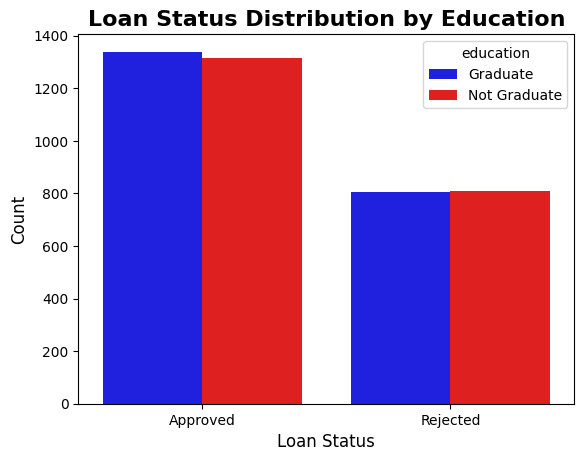

In [80]:
# Clean whitespace
df["loan_status"] = df["loan_status"].str.strip()
df["education"] = df["education"].str.strip()

# Define colors for education levels
custom_colors = {
    "Graduate": "blue",
    "Not Graduate": "red"
}

# Plot
sns.countplot(
    data=df,
    x="loan_status",
    hue="education",
    palette=custom_colors
)

# Title & labels
plt.title("Loan Status Distribution by Education", fontsize=16, fontweight="bold")
plt.xlabel("Loan Status", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Show plot
plt.show()

<Axes: xlabel='income_annum', ylabel='Count'>

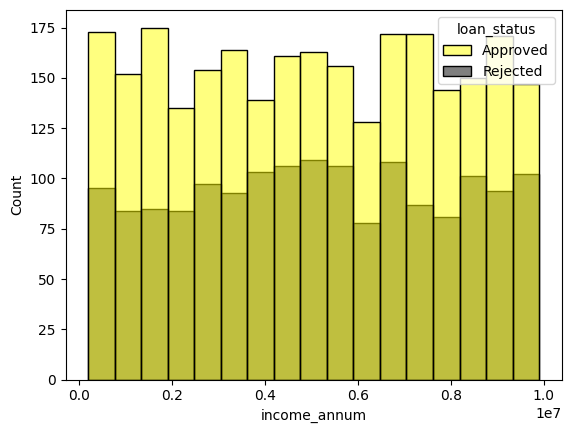

In [81]:
#explained the loan status on annual income

sns.histplot(
    data=df,
    x="income_annum",
    hue="loan_status",
    palette=["yellow", "black"]
)

<Axes: xlabel='cibil_score', ylabel='Count'>

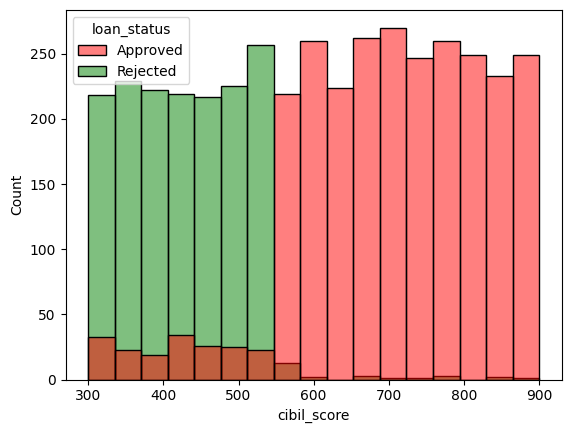

In [82]:
#explained the loan status on Cibil_score so here we can say that higest the cibil score then the highest chances to get loan

sns.histplot(
    data=df,
    x="cibil_score",
    hue="loan_status",
    palette=["red", "green"]
)

<Axes: xlabel='loan_term', ylabel='Count'>

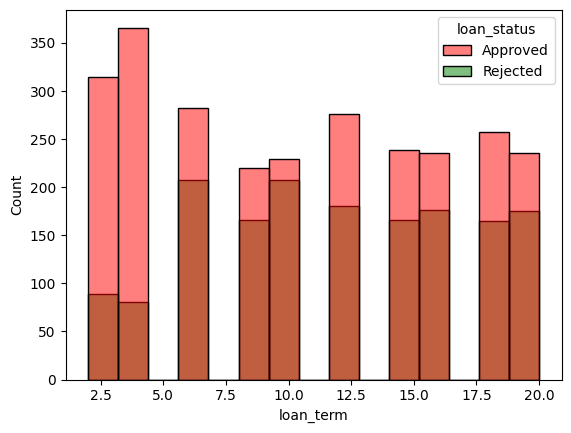

In [83]:
#explained the loan status on loan term if the loan term will be high then there is lower chnaces to get loan

sns.histplot(
    data=df,
    x="loan_term",
    hue="loan_status",
    palette=["red", "green"]
)

In [84]:
# Check unique values in 'loan_status' before mapping
print("Unique values in 'loan_status' before mapping:", df['loan_status'].unique())

# Map 'Approved' to 1 and 'Rejected' to 0
df['loan_status'] = df['loan_status'].map({'Approved': 1, 'Rejected': 0})

print("Unique values in 'loan_status' after mapping:", df['loan_status'].unique())

# Drop rows with NaN in 'loan_status' after mapping
df.dropna(subset=['loan_status'], inplace=True)

print("Number of rows after dropping NaNs:", len(df))

# Split features and target
X = df.drop(columns=['loan_status'])
y = df['loan_status']

# Identify categorical and numeric columns
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
num_cols = X.select_dtypes(exclude=['object']).columns.tolist()

print("Categorical columns:", cat_cols)
print("Numeric columns:", num_cols)

Unique values in 'loan_status' before mapping: ['Approved' 'Rejected']
Unique values in 'loan_status' after mapping: [1 0]
Number of rows after dropping NaNs: 4269
Categorical columns: ['education', 'self_employed']
Numeric columns: ['loan_id', 'no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']


In [85]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [86]:
features =['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status']
x=df[features].copy()
y=df['loan_status']

In [87]:
# Preprocessing: impute missing + scale/encode
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ]
)


In [88]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

print("Train size:", X_train.shape, "Test size:", X_test.shape)

Train size: (2988, 12) Test size: (1281, 12)


In [95]:
# It converts categorical string columns into numeric dummy (binary) columns.

X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)


In [94]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.65      0.73       484
           1       0.81      0.92      0.86       797

    accuracy                           0.82      1281
   macro avg       0.82      0.79      0.80      1281
weighted avg       0.82      0.82      0.82      1281

Confusion Matrix:
 [[316 168]
 [ 62 735]]


In [96]:
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
print("Accuracy:", model.score(X_test, y_test))
print("Model coefficients:", model.coef_)

ROC AUC Score: 0.9029366322054813
Accuracy: 0.8204527712724434
Model coefficients: [[-3.99872647e-04 -3.10545439e-02 -4.74522408e-07  6.45817666e-08
  -1.85480541e-01  8.83374597e-03  2.23981575e-09  1.05096229e-08
   1.06446594e-08  1.10079589e-08 -6.77488331e-03 -5.24135280e-03]]


In [103]:
# 1) Build example DataFrame (raw)
example_df = pd.DataFrame([example])

# 2) One-hot encode the example exactly like training:
example_dummies = pd.get_dummies(example_df)

# 3) Get the training feature columns that were used to fit the model.
#    You must have saved them when training. If not, and you still have X_train (the processed one) in memory:
trained_cols = X_train.columns   # <-- X_train must be the SAME processed frame used for fitting the model

# 4) Reindex example to the trained columns and fill missing columns with 0
example_processed = example_dummies.reindex(columns=trained_cols, fill_value=0)

# 5) Now predict
pre_prob = model.predict_proba(example_processed)[0, 1]
pred_class = model.predict(example_processed)[0]

print("Predicted probability (positive class):", pre_prob)
print("Predicted class:", pred_class)


Predicted probability (positive class): 3.79940125829248e-27
Predicted class: 0
